In [1]:
import numpy as np
import pandas as pd

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 1. Load data
- IMDB 데이터 사용
- column : type, review, label, file
- 10만개 데이터 중 NaN 데이터 없음.
- label의 경우 unsup, neg, pos가 각각 5만개, 2.5만, 2.5만개 있음

In [2]:
import chardet

# open data
with open('./data/imdb_master.csv', 'rb') as f:
    result= chardet.detect(f.read())
    
train = pd.read_csv('./data/imdb_master.csv', encoding=result['encoding'])
train.head()

,Unnamed: 0,type,review,label,file
0,0,test,Once again Mr. Costner has dragged out a movie...,neg,0_2.txt
1,1,test,This is an example of why the majority of acti...,neg,10000_4.txt
2,2,test,"First of all I hate those moronic rappers, who...",neg,10001_1.txt
3,3,test,Not even the Beatles could write songs everyon...,neg,10002_3.txt
4,4,test,Brass pictures (movies is not a fitting word f...,neg,10003_3.txt


In [30]:
# check dtype, NaN
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  100000 non-null  int64 
 1   type        100000 non-null  object
 2   review      100000 non-null  object
 3   label       100000 non-null  object
 4   file        100000 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [64]:
# check label value counts
train.label.value_counts()

unsup    50000
neg      25000
pos      25000
Name: label, dtype: int64

In [39]:
# change columns name
train_ = train.drop(columns= train.columns[[0,1,4]], axis=0)
train_.head()

,review,label
0,Once again Mr. Costner has dragged out a movie...,neg
1,This is an example of why the majority of acti...,neg
2,"First of all I hate those moronic rappers, who...",neg
3,Not even the Beatles could write songs everyon...,neg
4,Brass pictures (movies is not a fitting word f...,neg


In [40]:
# labeling : neg=negative(0) else=positive(1)
train_.label = [(l!='neg')*1 for l in train_.label]
train_.columns = ['user_review', 'positive']
train_.head()

,user_review,positive
0,Once again Mr. Costner has dragged out a movie...,0
1,This is an example of why the majority of acti...,0
2,"First of all I hate those moronic rappers, who...",0
3,Not even the Beatles could write songs everyon...,0
4,Brass pictures (movies is not a fitting word f...,0


In [82]:
# split data set : train, test
split = int(0.7*len(train_))
d_train = train_[:split]
d_test = train_[-split:]

print('data shape')
print('train :', d_train.shape)
print(d_train.positive.value_counts())
print('test :', d_test.shape)
print(d_test.positive.value_counts())

data shape
train : (70000, 2)
1    45000
0    25000
Name: positive, dtype: int64
test : (70000, 2)
1    62500
0     7500
Name: positive, dtype: int64


## 2. Preprocessing Data

In [83]:
from sklearn.feature_extraction.text import CountVectorizer

# Vectorize text : 
vectorize = CountVectorizer()
features = vectorize.fit_transform(d_train.user_review)
features

<70000x121229 sparse matrix of type '<class 'numpy.int64'>'
	with 9598445 stored elements in Compressed Sparse Row format>

In [96]:
print('number of features:', len(vectorize.get_feature_names()))
print('feature name:')
print(vectorize.get_feature_names()[:10])

number of features: 121229
feature name:
['00', '000', '0000', '00000000000', '0000000000001', '000000003', '00000001', '00001', '0001', '00015']


In [86]:
# 3만건에서 10개 데이터와 100번째에서 130번째 feature까지 확인
i = 30000
j = 100
words = vectorize.get_feature_names()[i:i+30]
pd.DataFrame(features[j:j+10,i:i+30].todense(), columns=words)

,dimanche,dimartino,dimas,dimbleby,dimbulb,dime,dimeco,dimension,dimensional,dimensionality,...,diminution,diminutive,dimitri,dimitriades,dimitrij,dimitrios,dimitrius,dimitrova,dimitru,dimitry
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


## 3. Modeling

In [87]:
from sklearn.naive_bayes import MultinomialNB

# Build and Train Model : Multinominal Naive Bayes
model1 = MultinomialNB()
model1.fit(features, d_train.positive) 

MultinomialNB()

In [97]:
# predict data
pred_train = model1.predict_proba(features)
pred_test = model1.predict_proba(vectorize.transform(d_test.user_review))

print('predict prob : test data')
print(np.round(pred_test,2))

predict prob : test data
[[1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 ...
 [1.   0.  ]
 [0.71 0.29]
 [0.   1.  ]]


In [113]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, roc_curve

# Estimation

def performance(y_true, pred, color='blue', ann=True):
    acc = accuracy_score(y_true, pred[:,1]>0.5)
    auc = roc_auc_score(y_true, pred[:,1])
    fpr, tpr, thr = roc_curve(y_true, pred[:,1])
    plot(fpr, tpr, color, linewidth='3')
    xlabel('False Positive Rate')
    ylabel('True Positive Rate')
    
    if ann:
        annotate('ACC: %.2f' %acc, (0.1,0.7), size=14)
        annotate('AUC: %.2f' %auc, (0.1,0.6), size=14)

ROC curve : train data


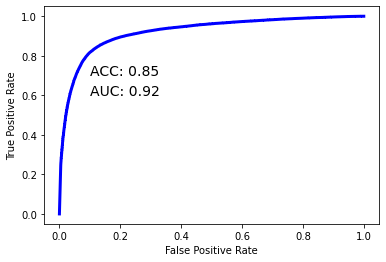

In [119]:
# train data
print('ROC curve : train data')
performance(d_train.positive.values, pred_train)

ROC curve : test data


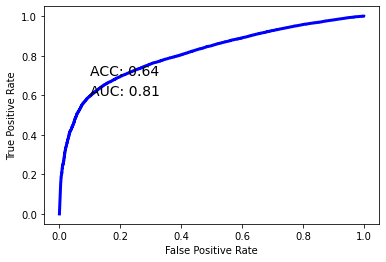

In [118]:
# test data
print('ROC curve : test data')
performance(d_test.positive.values, pred_test)